# Regularization II: Ridge

#### EXERCISE:
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the <em>absolute</em> value of each coefficient multiplied by some alpha. This is also known as $L1$ regularization because the regularization term is the $L1$ norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the <em>squared</em> values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the $L2$ norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each, using this function that we have defined for you, which plots the $R^2$ score as well as standard error for each alpha:

<pre><code>def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
</code></pre>

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the $R^2$ score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

#### INSTRUCTIONS:
* Instantiate a Ridge regressor and specify <code>normalize=True</code>.
* Inside the <code>for</code> loop:
 * Specify the alpha value for the regressor to use.
 * Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays <code>X</code> and <code>y</code>.
 * Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as <code>np</code>.
* Use the <code>display_plot()</code> function to visualize the scores and standard deviations.

#### SCRIPT.PY:

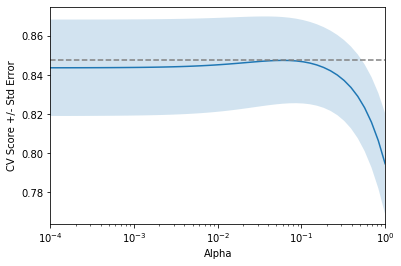

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
df = pd.read_csv("gapminder.csv")
y = df["life"]
X = df.drop("life", axis=1)

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
